<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/Correlation_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Correlation Heatmap**

**Download financial data:** Use yfinance to retrieve asset and currency pair data.

**Calculate daily returns:** Calculate daily returns for each asset.

**Calculate the correlation matrix:** Use pandas to calculate the correlation between asset returns.

**Create the heatmap:** Use seaborn to visualise the correlation matrix.

[*********************100%%**********************]  18 of 18 completed


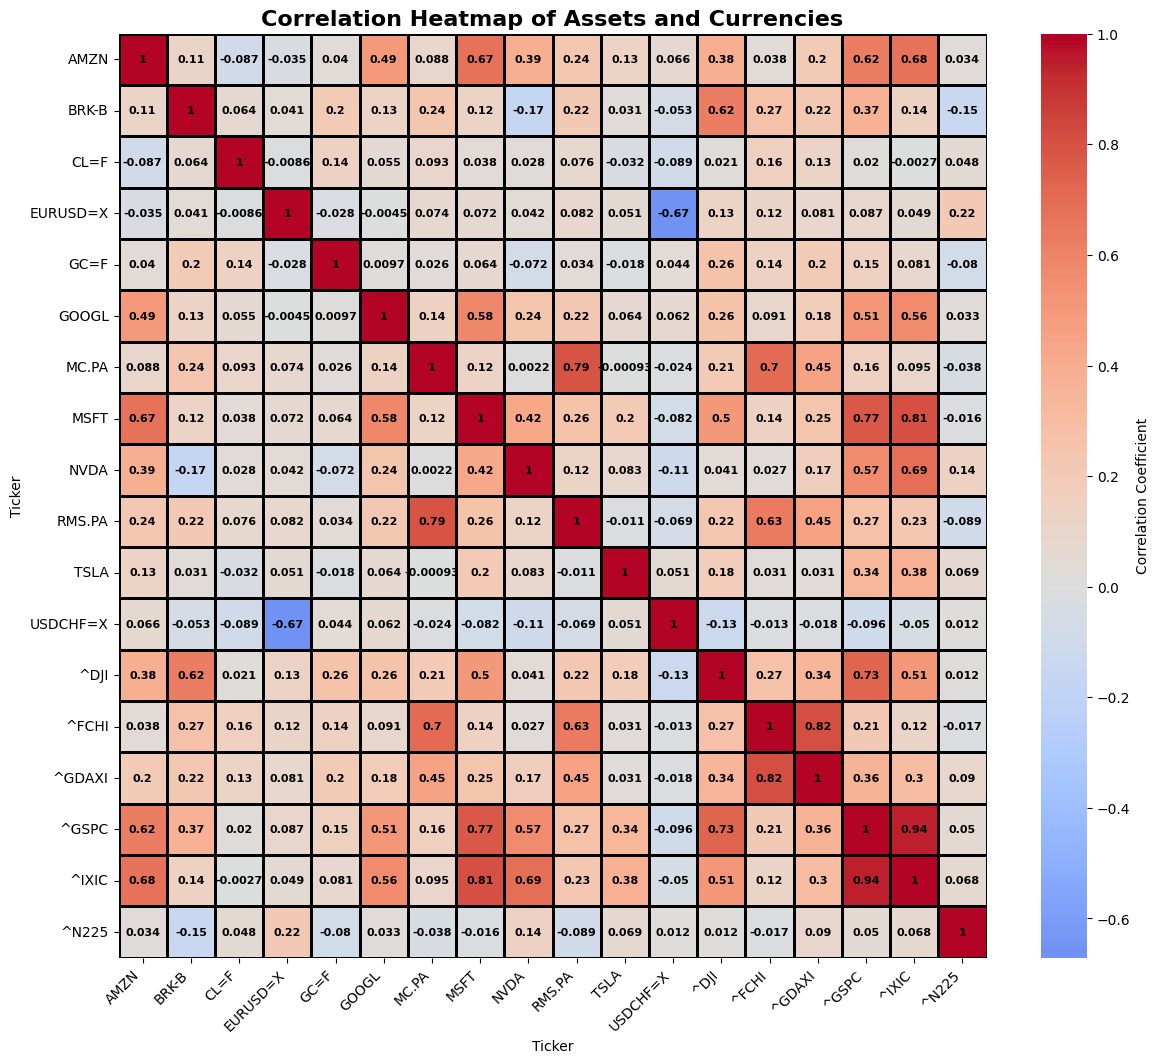

In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des symboles des actifs et des paires de devises
tickers = [
    "GC=F", "CL=F", "^IXIC", "^GSPC", "^DJI", "^GDAXI", "^FCHI", "^N225",
    "NVDA", "AMZN", "TSLA", "MC.PA", "RMS.PA", "BRK-B", "GOOGL", "MSFT",
    "USDCHF=X", "EURUSD=X"
]

# Télécharger les données des 6 derniers mois pour chaque actif
data = yf.download(tickers, period="6mo", interval="1d")

# Vérifier que les données ont été téléchargées correctement
if data.empty:
    raise ValueError("Les données n'ont pas pu être téléchargées. Veuillez vérifier les symboles des actifs.")

# Extraire les prix de clôture
close_prices = data['Close']

# Calculer les rendements quotidiens
daily_returns = close_prices.pct_change().dropna()

# Calculer la matrice de corrélation
correlation_matrix = daily_returns.corr()

# Créer la heatmap
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    cbar_kws={'label': 'Correlation Coefficient'},
    linewidths=1,
    linecolor='black',
    annot_kws={'color': 'black', 'weight': 'bold', 'size': 8}
)

# Rotation des étiquettes pour les rendre lisibles
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Correlation Heatmap of Assets and Currencies', fontsize=16, weight='bold')
plt.show()
